# Model Training

### 1.1  Import Data and zRequired Packages

In [1]:
# Basic import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV,train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import warnings


#### Import the CSV Data as Pandas Dataframe

In [2]:
df = pd.read_csv('../data/BikeDekho.csv')

In [3]:
df

,company,model,year,kms_driven,cc_type,fuel_type,place,ownership,price
0,Hero Honda,Passion Plus,2013,30000,Upto 100 cc,petrol,ahmedabad,First,40000
1,Hero,Motocorp Passion Pro Electric Start,2015,47500,Upto 100 cc,petrol,ahmedabad,First,30000
2,Hero,Motocorp Passion Pro Electric Start With Disc ...,2015,40000,Upto 100 cc,petrol,ahmedabad,First,30000
3,Hero,HF Deluxe Alloy Self Start,2017,30000,Upto 100 cc,petrol,ahmedabad,First,20000
4,TVS,XL100 Heavy Duty i Touch Start,2018,43000,Upto 100 cc,petrol,ahmedabad,First,30000
...,...,...,...,...,...,...,...,...,...
5736,Honda,CD 110 Dream Self Start,2018,14000,100 - 125 cc,petrol,yerraguntla,First,43500
5737,Hero,HF Deluxe Spoke Self Start,2015,40000,Upto 100 cc,petrol,zirakpur,First,36000
5738,Honda,Activa 125 Deluxe,2014,11000,100 - 125 cc,petrol,zirakpur,First,35000
5739,Bajaj,Pulsar 135LS 2018 STD,2012,22000,125 - 150 cc,petrol,zirakpur,Second,25000


In [4]:
df = df.sample(frac=1)

In [5]:
df

,company,model,year,kms_driven,cc_type,fuel_type,place,ownership,price
4812,Honda,Activa 5G DLX,2018,10000,100 - 125 cc,petrol,pimpri-chinchwad,First,55000
1430,TVS,Apache RTR 160 Disc,2017,14000,150 - 200 cc,petrol,gurgaon,First,65000
3078,Bajaj,Pulsar 180 STD (Non-ABS),2013,71000,150 - 200 cc,petrol,bhubaneshwar,First,35000
5568,Mahindra,Gusto DX,2015,20000,100 - 125 cc,petrol,vadodara,First,25000
1137,Bajaj,Pulsar NS160 Twin Disc ABS,2019,20000,150 - 200 cc,petrol,delhi,First,90000
...,...,...,...,...,...,...,...,...,...
2689,Honda,Dio,2014,55000,100 - 125 cc,petrol,allahabad,First,30000
3098,TVS,Apache RTR 160 Dual Disc,2013,32000,150 - 200 cc,petrol,biaora,First,40000
4896,Bajaj,Discover 100,2012,36500,Upto 100 cc,petrol,rajahmundry,Second,17000
5296,Bajaj,Platina 100,2016,16000,Upto 100 cc,petrol,surat,First,35000


In [6]:
df.reset_index(drop=True, inplace=True)

### Preparing X and y variables

In [7]:
X = df.drop(columns=['price', 'model'], axis=1)
y = df['price']

In [8]:
X.head()

,company,year,kms_driven,cc_type,fuel_type,place,ownership
0,Honda,2018,10000,100 - 125 cc,petrol,pimpri-chinchwad,First
1,TVS,2017,14000,150 - 200 cc,petrol,gurgaon,First
2,Bajaj,2013,71000,150 - 200 cc,petrol,bhubaneshwar,First
3,Mahindra,2015,20000,100 - 125 cc,petrol,vadodara,First
4,Bajaj,2019,20000,150 - 200 cc,petrol,delhi,First


In [9]:
y.head()

0    55000
1    65000
2    35000
3    25000
4    90000
Name: price, dtype: int64

In [10]:
num_features = [feature for feature in X.columns if X[feature].dtype!='O']
cat_features = [feature for feature in X.columns if X[feature].dtype=='O']
all_features = [feature for feature in X.columns]

In [11]:
all_features,cat_features,num_features

(['company',
  'year',
  'kms_driven',
  'cc_type',
  'fuel_type',
  'place',
  'ownership'],
 ['company', 'cc_type', 'fuel_type', 'place', 'ownership'],
 ['year', 'kms_driven'])

In [12]:
# create column Transformers  with 3 types of transformers
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

In [13]:
preprocessor = ColumnTransformer(
    [
        ('TargetEncoder',ce.TargetEncoder(cols=['company', 'cc_type', 'place',]),['company', 'cc_type', 'place']),
        ('OneHotEncoder',OneHotEncoder(),['fuel_type','ownership']),
        ("StandardScaler",StandardScaler(),['kms_driven','year']),
    ]

)

In [14]:
preprocessor

ColumnTransformer(transformers=[('TargetEncoder',
                                 TargetEncoder(cols=['company', 'cc_type',
                                                     'place']),
                                 ['company', 'cc_type', 'place']),
                                ('OneHotEncoder', OneHotEncoder(),
                                 ['fuel_type', 'ownership']),
                                ('StandardScaler', StandardScaler(),
                                 ['kms_driven', 'year'])])

In [15]:
X=preprocessor.fit_transform(X, y)

In [16]:
X

array([[ 4.52061787e+04,  3.72880130e+04,  6.88605376e+04, ...,
         0.00000000e+00, -6.37466338e-01,  9.19477189e-01],
       [ 4.97399360e+04,  6.85022496e+04,  7.52479021e+04, ...,
         0.00000000e+00, -5.06597538e-01,  5.94592985e-01],
       [ 5.54709934e+04,  6.85022496e+04,  5.31048585e+04, ...,
         0.00000000e+00,  1.35828285e+00, -7.04943830e-01],
       ...,
       [ 5.54709934e+04,  3.08029784e+04,  6.38587949e+04, ...,
         0.00000000e+00,  2.29539457e-01, -1.02982803e+00],
       [ 5.54709934e+04,  3.08029784e+04,  5.28907219e+04, ...,
         0.00000000e+00, -4.41163139e-01,  2.69708782e-01],
       [ 5.54709934e+04,  3.08029784e+04,  5.88082918e+04, ...,
         0.00000000e+00,  4.95948583e-02, -1.02982803e+00]])

In [17]:
X.shape

(5741, 11)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((4592, 11), (4592,))

### Create an Evaluation Function to giev all metrics after model Training



In [19]:
def evaluate_model(true, pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true,pred)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, pred)
    return mae, rmse, r2_square
    

In [20]:
models = {
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbours Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "Ada Boost Regressor":AdaBoostRegressor(),
    "Logistic Regression":LogisticRegression(),
    "XG Boost Regressor":XGBRegressor(),
    'Cat Boost Regressor':CatBoostRegressor(),
}

In [21]:
model_list = []
r2_list = []

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Performance for Training set")
    print(" - Root Mean squared error : {:.4f}".format(model_train_rmse))
    print(" - Mean Absolute error : {:.4f}".format(model_train_mae))
    print(" - R2 squared error : {:.4f}".format(model_train_r2))
    print('-------------------------------------------------------------')
    print("Model Performance for Testing set")
    print(" - Root Mean squared error : {:.4f}".format(model_test_rmse))
    print(" - Mean Absolute error : {:.4f}".format(model_test_mae))
    print(" - R2 squared error : {:.4f}".format(model_test_r2))
    print("=============================================================",end='\n\n')
    r2_list.append(model_test_r2)
    

Linear Regression
Model Performance for Training set
 - Root Mean squared error : 66083.1131
 - Mean Absolute error : 21538.0944
 - R2 squared error : 0.4729
-------------------------------------------------------------
Model Performance for Testing set
 - Root Mean squared error : 45846.0368
 - Mean Absolute error : 22237.6788
 - R2 squared error : 0.6639

Lasso
Model Performance for Training set
 - Root Mean squared error : 66083.1258
 - Mean Absolute error : 21536.9206
 - R2 squared error : 0.4729
-------------------------------------------------------------
Model Performance for Testing set
 - Root Mean squared error : 45845.9980
 - Mean Absolute error : 22237.7000
 - R2 squared error : 0.6639

Ridge
Model Performance for Training set
 - Root Mean squared error : 66083.5429
 - Mean Absolute error : 21531.5524
 - R2 squared error : 0.4729
-------------------------------------------------------------
Model Performance for Testing set
 - Root Mean squared error : 45844.1991
 - Mean Ab

/home/kishor/Coding/Commodity/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model Performance for Training set
 - Root Mean squared error : 74546.8960
 - Mean Absolute error : 26218.0736
 - R2 squared error : 0.3292
-------------------------------------------------------------
Model Performance for Testing set
 - Root Mean squared error : 59492.3693
 - Mean Absolute error : 27282.4682
 - R2 squared error : 0.4340

XG Boost Regressor
Model Performance for Training set
 - Root Mean squared error : 9041.4098
 - Mean Absolute error : 6429.5034
 - R2 squared error : 0.9901
-------------------------------------------------------------
Model Performance for Testing set
 - Root Mean squared error : 62654.2921
 - Mean Absolute error : 17924.8801
 - R2 squared error : 0.3722

Learning rate set to 0.052093
0:	learn: 88649.3442064	total: 49.3ms	remaining: 49.2s
1:	learn: 86151.6314741	total: 51.2ms	remaining: 25.6s
2:	learn: 83971.4109262	total: 52.7ms	remaining: 17.5s
3:	learn: 81857.3874016	total: 54.2ms	remaining: 13.5s
4:	learn: 79622.6950187	total

In [46]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name', 'R2 Square']).sort_values(by=['R2 Square'], ascending=True)

,Model Name,R2 Square
6,Ada Boost Regressor,0.421799
7,Logistic Regression,0.463091
3,K-Neighbours Regressor,0.555193
4,Decision Tree,0.578317
0,Linear Regression,0.590952
1,Lasso,0.591013
2,Ridge,0.591305
5,Random Forest Regressor,0.731235


In [47]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name', 'R2 Square']).sort_values(by=['R2 Square'], ascending=True)

,Model Name,R2 Square
6,Ada Boost Regressor,0.421799
7,Logistic Regression,0.463091
3,K-Neighbours Regressor,0.555193
4,Decision Tree,0.578317
0,Linear Regression,0.590952
1,Lasso,0.591013
2,Ridge,0.591305
5,Random Forest Regressor,0.731235


In [59]:
lin_model = RandomForestRegressor()
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 72.20


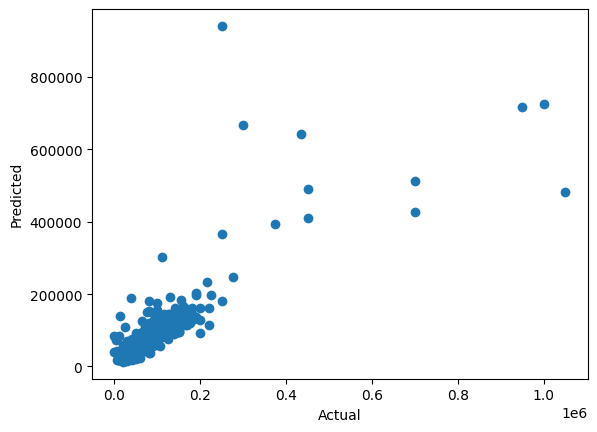

In [60]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

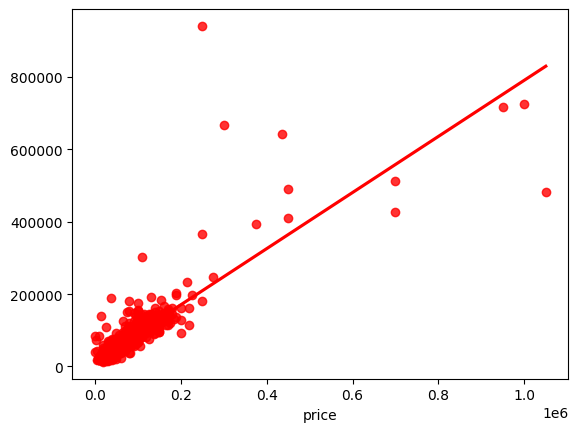

In [61]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [51]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df


,Actual Value,Predicted Value,Difference
763,40000,24755.000000,15245.000000
2991,45000,50550.000000,-5550.000000
4631,35000,60945.000000,-25945.000000
3509,48000,52980.000000,-4980.000000
3384,25000,44233.540000,-19233.540000
...,...,...,...
3875,40000,35358.333333,4641.666667
677,35000,45959.970000,-10959.970000
1295,45000,47700.000000,-2700.000000
4327,120000,118949.950000,1050.050000


In [52]:
pred_df[:20]

,Actual Value,Predicted Value,Difference
763,40000,24755.000000,15245.000000
2991,45000,50550.000000,-5550.000000
4631,35000,60945.000000,-25945.000000
3509,48000,52980.000000,-4980.000000
3384,25000,44233.540000,-19233.540000
1586,32000,30330.000000,1670.000000
2437,110000,103649.850000,6350.150000
3094,40000,46370.000000,-6370.000000
199,28000,30735.000000,-2735.000000
2803,50000,48375.000000,1625.000000
